# Requirements

How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv
df = pd.read_csv("collected data9.6.2019/merged_data.csv", index_col=0)

In [3]:
# list of columns
co = list(df.columns)

# preview columns
co[:30]

['ladder_rank',
 'player_id',
 'score',
 'time',
 'spm',
 'avengerKills',
 'deaths',
 'dogtagsTaken',
 'extra.accuracy',
 'extra.assignments',
 'extra.gspm',
 'extra.hkp',
 'extra.kdr',
 'extra.khp',
 'extra.medals',
 'extra.medalsUnique',
 'extra.ribbons',
 'extra.ribbonsUnique',
 'extra.ribpr',
 'extra.roundsFinished',
 'extra.sfpm',
 'extra.spm',
 'extra.unknownKills',
 'extra.vehKillsP',
 'extra.vehTimeP',
 'extra.vehicleKills',
 'extra.vehicleTime',
 'extra.weaKillsP',
 'extra.weaKpm',
 'extra.weaTimeP']

In [4]:
# create function that exclude entries in list containing dots
def exclude_dot(i):
        if('.' not in i):
            return(True)
        else:
            return(False)
        
# utilize filter to filter out headers containing general stats
filtered = filter(exclude_dot, co)

# add the filtered values into blank list
co = []
for s in filtered: 
    co.append(s)

# print out the basic stats data that we are going to work with
print(co)

['ladder_rank', 'player_id', 'score', 'time', 'spm', 'avengerKills', 'deaths', 'dogtagsTaken', 'flagCaptures', 'flagDefend', 'headshots', 'heals', 'killAssists', 'killStreakBonus', 'kills', 'longestHeadshot', 'mcomDefendKills', 'nemesisKills', 'nemesisStreak', 'numLosses', 'numRounds', 'numWins', 'battle_rank', 'repairs', 'resupplies', 'revives', 'saviorKills', 'shotsFired', 'shotsHit', 'skill', 'suppressionAssists', 'timePlayed', 'vehicleDamage', 'vehiclesDestroyed', 'Conquest_score', 'Rush_score', 'Deathmatch_score', 'Domination_score', 'Obliteration_score']


In [5]:
# Create our new dataframe using the general stats header
df_basic = df[co]
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37839 entries, 0 to 37838
Data columns (total 39 columns):
ladder_rank           37839 non-null int64
player_id             37839 non-null object
score                 37839 non-null int64
time                  37839 non-null object
spm                   37839 non-null float64
avengerKills          37839 non-null int64
deaths                37839 non-null int64
dogtagsTaken          37839 non-null int64
flagCaptures          37839 non-null int64
flagDefend            37839 non-null int64
headshots             37839 non-null int64
heals                 37839 non-null int64
killAssists           37839 non-null int64
killStreakBonus       37839 non-null int64
kills                 37839 non-null int64
longestHeadshot       37839 non-null int64
mcomDefendKills       37839 non-null int64
nemesisKills          37839 non-null int64
nemesisStreak         37839 non-null int64
numLosses             37839 non-null int64
numRounds             37839

In [6]:
# drop ladder_rank since it is decided by score, and drop time since timeplayed is a duplicate of time
df_basic_1 = df_basic.drop(['ladder_rank', 'time'], axis=1)

In [7]:
# obtain a preview of the data
df_basic_1.head()

,player_id,score,spm,avengerKills,deaths,dogtagsTaken,flagCaptures,flagDefend,headshots,heals,...,skill,suppressionAssists,timePlayed,vehicleDamage,vehiclesDestroyed,Conquest_score,Rush_score,Deathmatch_score,Domination_score,Obliteration_score
0,Oculus Mortis I,413158680,941.95,62235,286403,3700,54969,69834,91869,13933,...,692,15847,26775000,27045,27212,113335000,15922400,333250,4855,83813
1,xRubberDuckZ,342215383,1699.06,70299,136460,898,25246,85316,100400,349590,...,804,26670,12195200,8158,7579,55501000,29080,19700,9662,2420
2,MAGNUM MU5TACHE,341161293,939.07,51888,131168,1639,52688,74987,71278,470373,...,396,33659,21825100,46827,43944,59109600,2848810,94950,2572780,500036
3,Divine Yuuko,339846192,971.45,51266,166087,2394,14277,30736,130528,35976,...,648,19400,21389200,51660,50597,33980700,41344500,24300,50770,873057
4,fOOzviking,313057805,976.21,51743,312395,6662,4455,5244,58797,33835,...,459,35201,19409500,51225,51512,6734400,86438304,2300,18077,177562


In [8]:
# calculate a few extra stats and replace infinity values with NAN
df_basic_1['W_L'] = df_basic_1['numWins']/df_basic_1['numLosses']
df_basic_1['K_D'] = df_basic_1['kills']/df_basic_1['deaths']
df_basic_1['H_H'] = df_basic_1['headshots']/df_basic_1['shotsHit']
df_basic_1 = df_basic_1.replace([np.inf, -np.inf], np.nan)

In [9]:
# describe the stats data and 
df_basic_stats = df_basic_1.describe().astype(float).applymap('{:,.2f}'.format)
df_basic_stats

,score,spm,avengerKills,deaths,dogtagsTaken,flagCaptures,flagDefend,headshots,heals,killAssists,...,vehicleDamage,vehiclesDestroyed,Conquest_score,Rush_score,Deathmatch_score,Domination_score,Obliteration_score,W_L,K_D,H_H
count,"37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00",...,"37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,839.00","37,314.00","37,838.00","37,837.00"
mean,"7,643,318.65",423.82,890.12,"7,230.03",118.97,"1,278.64","1,420.35","1,453.02","2,708.54",807.44,...,"1,147.44","1,067.85","2,119,570.02","128,439.49","13,723.59","9,495.50","15,943.35",1.09,0.98,0.03
std,"20,340,082.30",314.85,"2,734.73","17,835.32",755.86,"4,147.05","4,633.82","4,204.78","11,452.68","2,461.15",...,"4,851.45","5,079.38","6,260,258.92","1,104,594.73","89,001.51","82,442.82","239,917.49",0.94,0.74,0.02
min,"10,005.00",23.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"72,888.50",227.42,15.00,214.00,1.00,18.00,15.00,25.00,3.00,14.00,...,5.00,4.00,"31,197.50",0.00,0.00,0.00,0.00,0.77,0.62,0.02
50%,"503,531.00",347.54,74.00,900.00,9.00,91.00,89.00,128.00,70.00,67.00,...,37.00,31.00,"161,275.00",0.00,600.00,0.00,0.00,0.96,0.86,0.03
75%,"5,329,172.00",540.18,559.00,"6,000.00",72.00,716.00,763.00,"1,002.00","1,116.00",495.00,...,411.00,352.00,"1,272,730.00","21,275.00","4,100.00",685.00,"1,080.00",1.19,1.16,0.04
max,"413,158,680.00","13,023.64","70,299.00","400,376.00","80,311.00","100,141.00","96,904.00","130,528.00","470,373.00","64,094.00",...,"222,737.00","398,918.00","118,697,000.00","86,438,304.00","3,601,250.00","5,222,100.00","32,540,400.00",112.00,33.38,0.65


In [10]:
# convert timeplayed from seconds to minutes
df_basic_1['timePlayed'] = df_basic_1['timePlayed']/60

In [11]:
# since a lot of the data shows extreme values from end to end, we should consider dividing the stats with timeplayed.
# create a list of data we'd like to divide by timePlayed

list_df = list(df_basic_1.columns)
list_df = list_df[1:-4]

removal = ['skill','score','spm','longestHeadshot','battle_rank','timePlayed']

for i in removal:
    list_df.remove(i)

print(list_df)

['avengerKills', 'deaths', 'dogtagsTaken', 'flagCaptures', 'flagDefend', 'headshots', 'heals', 'killAssists', 'killStreakBonus', 'kills', 'mcomDefendKills', 'nemesisKills', 'nemesisStreak', 'numLosses', 'numRounds', 'numWins', 'repairs', 'resupplies', 'revives', 'saviorKills', 'shotsFired', 'shotsHit', 'suppressionAssists', 'vehicleDamage', 'vehiclesDestroyed', 'Conquest_score', 'Rush_score', 'Deathmatch_score', 'Domination_score']


In [12]:
# convert these columns to per minute stats
for i in list_df:
    string_df = i + '_pm'
    df_basic_1[string_df] = df_basic_1[i]/df_basic_1['timePlayed']
    df_basic_1 = df_basic_1.drop(i,axis = 1)

In [13]:
# remove stat columns that are useless
df_basic_1 = df_basic_1.drop(['longestHeadshot','battle_rank'], axis = 1)

## Can you count something interesting?

In the plot below we can see that the skill the time devoted to the game and the skill level of the player is very spread out.
75% of players have a skill level below 237, have less than 180 hours of gameplay and have a spm below 540. However, there is some suspicion about the data, as the highest Win/Loss Ratio for a player is 112, and highest headshot/shots hit ratio is 33 times that of the average player. We can use a scatter plot to look at this data, as there could be game cheaters or outliers. 

In [14]:
df_basic_stats = df_basic_1.describe().astype(float).applymap('{:,.2f}'.format)
df_basic_stats.T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
score,"7,643,318.65","20,340,082.30","10,005.00","72,888.50","503,531.00","5,329,172.00","413,158,680.00"
spm,423.82,314.85,23.96,227.42,347.54,540.18,"13,023.64"
skill,196.23,87.88,0.00,134.00,180.00,237.00,936.00
timePlayed,"14,092.35","34,759.25",0.00,365.02,"1,537.23","11,137.32","559,241.67"
Obliteration_score,"15,943.35","239,917.49",0.00,0.00,0.00,"1,080.00","32,540,400.00"
W_L,1.09,0.94,0.00,0.77,0.96,1.19,112.00
K_D,0.98,0.74,0.00,0.62,0.86,1.16,33.38
H_H,0.03,0.02,0.00,0.02,0.03,0.04,0.65
avengerKills_pm,0.05,0.03,0.00,0.03,0.05,0.07,0.51
deaths_pm,0.58,0.14,0.02,0.49,0.57,0.66,1.94


## Can you make a scatterplot?

In the data below we've used a scatter plot to display the compare the skill level of the player with two important ratios, one is Win Loss rate, the other is headshot/shots hit rate. We can see that there are two data points that are abnormal, one is a player at skill level 359 (highest skill level is 936), but having a very high win/loss rate of above 100, the  other is a player who has a skill level of only 152, but having a win/loss rate of above 65%. While it is hard to determine why these players had such abnormal scores, we'd have to remove them from our analysis so that we can be more objective with our observation.

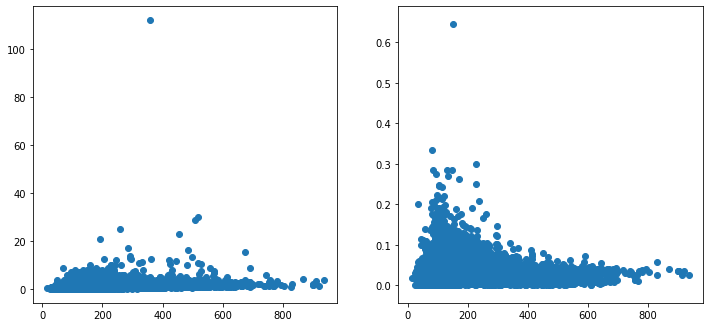

In [15]:
_ = plt.subplots(figsize=(12,12))

_ = plt.subplot(2,2,1)
plt.scatter(df_basic_1.skill,df_basic_1.W_L)

_ = plt.subplot(2,2,2)
plt.scatter(df_basic_1.skill,df_basic_1.H_H)

In [16]:
pd.DataFrame(df_basic_1.loc[df_basic_1['W_L'].idxmax()]).head(10)

,11454
player_id,KillaSapphire
score,3386288
spm,1643.2
skill,359
timePlayed,3001.62
Obliteration_score,0
W_L,112
K_D,1.06872
H_H,0.0198931
avengerKills_pm,0.0946157


In [17]:
pd.DataFrame(df_basic_1.loc[df_basic_1['H_H'].idxmax()]).head(10)

,1541
player_id,FigueBeche91379
score,45787741
spm,331.54
skill,152
timePlayed,138106
Obliteration_score,0
W_L,0.657084
K_D,5.27048
H_H,0.645837
avengerKills_pm,0.00593746


In [18]:
# remove outliers
df_basic_1 = df_basic_1[df_basic_1.player_id != 'KillaSapphire']
df_basic_1 = df_basic_1[df_basic_1.player_id != 'FigueBeche91379']

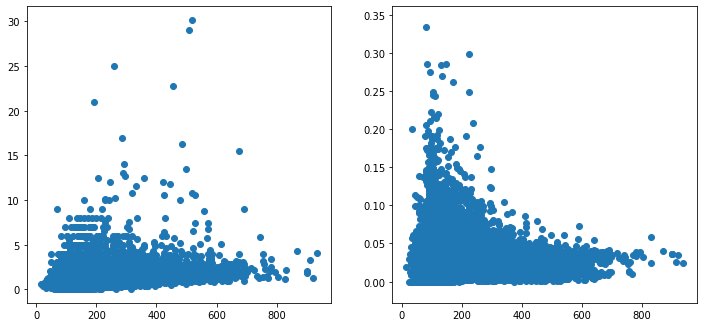

In [19]:
_ = plt.subplots(figsize=(12,12))

_ = plt.subplot(2,2,1)
plt.scatter(df_basic_1.skill,df_basic_1.W_L)

_ = plt.subplot(2,2,2)
plt.scatter(df_basic_1.skill,df_basic_1.H_H)

In [20]:
df_basic_stats = df_basic_1.describe().astype(float).applymap('{:,.2f}'.format)
df_basic_stats.T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
score,"7,642,423.04","20,339,662.78","10,005.00","72,851.00","503,521.00","5,328,658.00","413,158,680.00"
spm,423.79,314.80,23.96,227.40,347.54,540.17,"13,023.64"
skill,196.23,87.88,0.00,134.00,180.00,237.00,936.00
timePlayed,"14,089.37","34,754.27",0.00,365.02,"1,537.17","11,135.55","559,241.67"
Obliteration_score,"15,944.19","239,923.80",0.00,0.00,0.00,"1,080.00","32,540,400.00"
W_L,1.08,0.75,0.00,0.77,0.96,1.19,30.18
K_D,0.98,0.74,0.00,0.62,0.86,1.16,33.38
H_H,0.03,0.02,0.00,0.02,0.03,0.04,0.33
avengerKills_pm,0.05,0.03,0.00,0.03,0.05,0.07,0.51
deaths_pm,0.58,0.14,0.02,0.49,0.57,0.66,1.94


## Can you find trends (e.g. high, low, increasing, decreasing, anomalies)? Can you make a bar plot or a histogram?

In the analysis below, we used histograms to analyze player skill level, time played, K/D, W/L, H/H. We want to see if more time spent playing the game led to the increase of these stats. Here, we've split the player base into three groups:
the generic player base;
the 1000 hour player;
the highly skilled players.

In the charts below we compare the stats of 1000 hour player vs generic players, we can see improvements made by the 1000 hour players in terms of skill, K/D, W/L, however, we can see that headshots/hits doesn't seem to have improved. In fact, based on the data in the chart, in order to gain improved wins and kills, 1000 hour players are making less headshots within the game.

In the second series of charts, we see that high skilled players in general seems to be making less progress in terms of W/L, this could be that the game is auto matching high skilled players against each other to make sure the game is well-balanced. We do see that for high skilled players, an improvement in H/H which means that H/H does play a part in improve in skill level and K/D, but not as much as one would think in terms of W/L.

In [21]:
# count the number of players who have contributed more than 1000 hours on the game
df_basic_1000 = df_basic_1[df_basic_1['timePlayed'] > 60000]
df_high_skill = df_basic_1[df_basic_1['skill'] > 350]
df_low_skill = df_basic_1[df_basic_1['skill'] < 100]
print("count of thousand hour players:")
print(len(df_basic_1000))
print("count of low skill players:")
print(len(df_low_skill))
print("count of high skill players:")
print(len(df_high_skill))

count of thousand hour players:
2372
count of low skill players:
3073
count of high skill players:
2080


C:\Users\alanl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alanl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


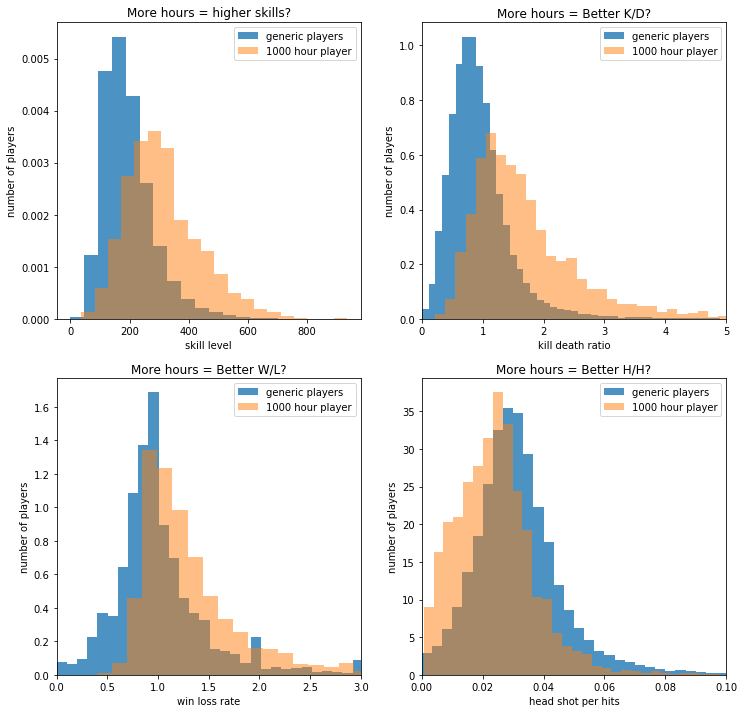

In [22]:
# we can plot them on all players to see what the distribution of the stats look like
_ = plt.subplots(figsize=(12,12))

_ = plt.subplot(2,2,1)
_ = plt.hist(df_basic_1.skill,bins = 20, density=True, alpha = 0.8,label="generic players")
_ = plt.hist(df_basic_1000.skill,bins = 20, density=True, alpha = 0.5,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('skill level')
_ = plt.title('More hours = higher skills?')
_ = plt.legend(loc='upper right')

_ = plt.subplot(2,2,2)
_ = plt.hist(df_basic_1.K_D,bins = 300, density=True, alpha = 0.8,label="generic players")
_ = plt.hist(df_basic_1000.K_D,bins = 200, density=True, alpha = 0.5,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('kill death ratio')
_ = plt.title('More hours = Better K/D?')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,5)

_ = plt.subplot(2,2,3)
_ = plt.hist(df_basic_1.W_L,bins = 300, density=True, alpha = 0.8,label="generic players",)
_ = plt.hist(df_basic_1000.W_L,bins = 200, density=True, alpha = 0.5,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('win loss rate')
_ = plt.title('More hours = Better W/L?')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,3)

_ = plt.subplot(2,2,4)
_ = plt.hist(df_basic_1.H_H,bins = 100, density=True, alpha = 0.8,label="generic players")
_ = plt.hist(df_basic_1000.H_H,bins = 50, density=True, alpha = 0.5,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('head shot per hits')
_ = plt.title('More hours = Better H/H?')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,0.1)

_ = plt.show()

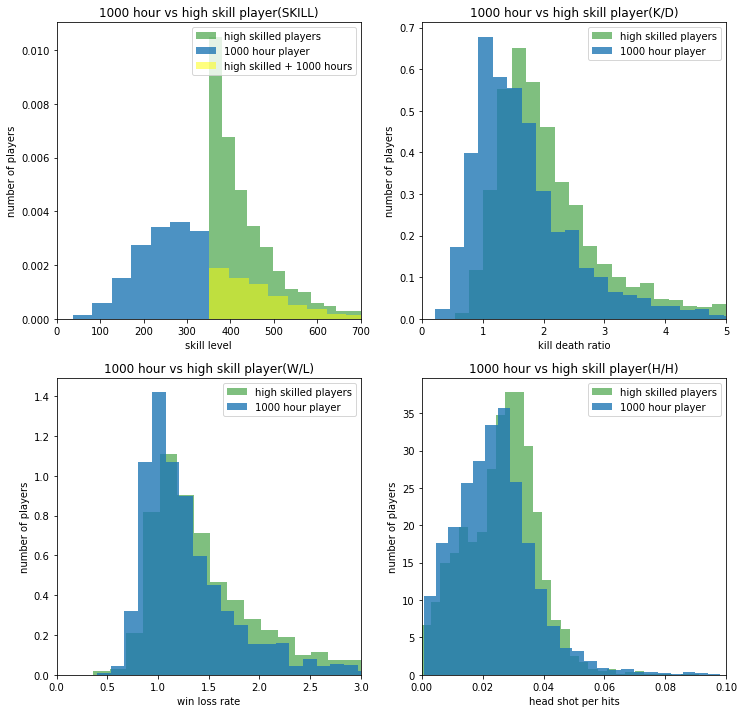

In [23]:
# we can plot them on all players to see what the distribution of the stats look like
_ = plt.subplots(figsize=(12,12))
    
_ = plt.subplot(2,2,1)
_ = plt.hist(df_high_skill.skill,bins = 20, density=True, color = 'g', alpha = 0.5,label="high skilled players",)
n, bins, patches = plt.hist(df_basic_1000.skill,bins = 20, density=True, alpha = 0.8,label="1000 hour player")
_ = plt.setp(patches[8:], 'facecolor', 'yellow', alpha = 0.5)
_ = plt.setp(patches[7], 'facecolor', 'yellow', label ='high skilled + 1000 hours', alpha = 0.5)
_ = plt.ylabel('number of players')
_ = plt.xlabel('skill level')
_ = plt.title('1000 hour vs high skill player(SKILL)')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,700)

_ = plt.subplot(2,2,2)
_ = plt.hist(df_high_skill.K_D,bins = 140, density=True, color = 'g',alpha = 0.5,label="high skilled players")
_ = plt.hist(df_basic_1000.K_D,bins = 140, density=True, alpha = 0.8,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('kill death ratio')
_ = plt.title('1000 hour vs high skill player(K/D)')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,5)

_ = plt.subplot(2,2,3)
_ = plt.hist(df_high_skill.W_L,bins = 180, density=True, color = 'g', alpha = 0.5,label="high skilled players",)
_ = plt.hist(df_basic_1000.W_L,bins = 220, density=True, alpha = 0.8,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('win loss rate')
_ = plt.title('1000 hour vs high skill player(W/L)')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,3)

_ = plt.subplot(2,2,4)
_ = plt.hist(df_high_skill.H_H,bins = 30, density=True, color = 'g',alpha = 0.5,label="high skilled players")
_ = plt.hist(df_basic_1000.H_H,bins = 40, density=True, alpha = 0.8,label="1000 hour player")
_ = plt.ylabel('number of players')
_ = plt.xlabel('head shot per hits')
_ = plt.title('1000 hour vs high skill player(H/H)')
_ = plt.legend(loc='upper right')
_ = plt.xlim(0,0.1)

_ = plt.show()

## Can you compare two related quantities?

In the plots below, we compare the relations between "kills/minute" vs "headshots/minute", and also "kills/minute" vs "deaths/minute". We compare the data of two groups, players with high of over 350 and players with low skills below 100. We can see from the data that low skill players have trouble making kills and getting head shots. Whereas high skilled player are able to make significant more headshots and kills. While it does seem that there is a linear relation between headshots and kills made, there are still a significant amount of players that are actually making kills with less headshots per minute, majority of high skilled players are only making headshots of 0.1 to 0.25 per minute but also averaging around 1 to 1.5 kills per mintue. There are a good amount of randomness for kills per minute above 1.5. On the other hand, if we look at survivability, which is counted using deaths per minute. We can see that being able to survive doesn't seem to contribute that much to the ability to make kills. The correlation between kills and deaths are seemingly not related

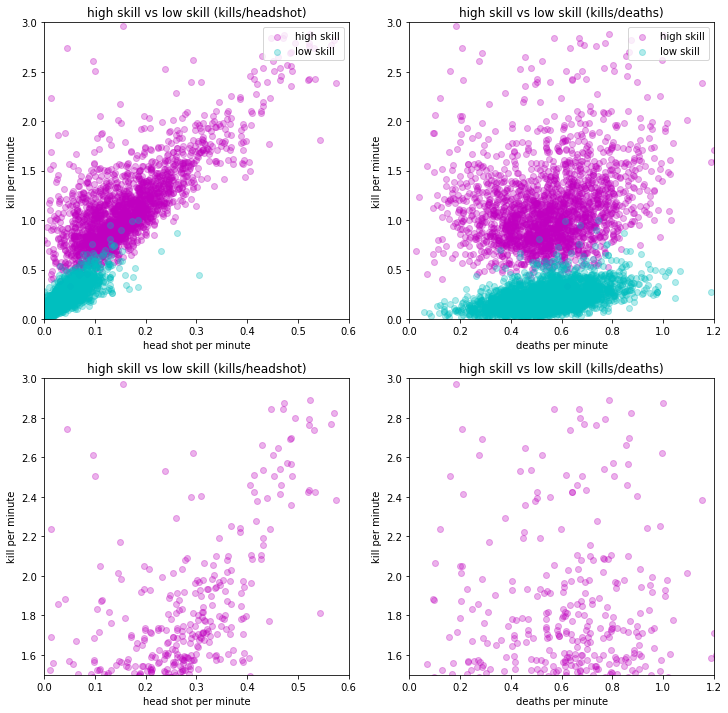

In [26]:
_ = plt.subplots(figsize=(12,12))
_ = plt.subplot(2,2,1)
_ = plt.scatter(df_high_skill.headshots_pm,df_high_skill.kills_pm, alpha = 0.3, color = 'm',label = 'high skill')
_ = plt.scatter(df_low_skill.headshots_pm,df_low_skill.kills_pm, alpha = 0.3, color = 'c',  label = 'low skill')
_ = plt.legend(loc='upper right')
_ = plt.xlabel('head shot per minute')
_ = plt.ylabel('kill per minute')
_ = plt.title('high skill vs low skill (kills/headshot)')
_ = plt.ylim(0,3)
_ = plt.xlim(0,0.6)

_ = plt.subplot(2,2,2)
_ = plt.scatter(df_high_skill.deaths_pm,df_high_skill.kills_pm, alpha = 0.3, color = 'm', label = 'high skill')
_ = plt.scatter(df_low_skill.deaths_pm,df_low_skill.kills_pm, alpha = 0.3, color = 'c',  label = 'low skill')
_ = plt.legend(loc='upper right')
_ = plt.xlabel('deaths per minute')
_ = plt.ylabel('kill per minute')
_ = plt.title('high skill vs low skill (kills/deaths)')
_ = plt.ylim(0,3)
_ = plt.xlim(0,1.2)

_ = plt.subplot(2,2,3)
_ = plt.scatter(df_high_skill.headshots_pm,df_high_skill.kills_pm, alpha = 0.3, color = 'm',label = 'high skill')
_ = plt.xlabel('head shot per minute')
_ = plt.ylabel('kill per minute')
_ = plt.title('high skill vs low skill (kills/headshot)')
_ = plt.ylim(1.5,3)
_ = plt.xlim(0,0.6)

_ = plt.subplot(2,2,4)
_ = plt.scatter(df_high_skill.deaths_pm,df_high_skill.kills_pm, alpha = 0.3, color = 'm', label = 'high skill')
_ = plt.xlabel('deaths per minute')
_ = plt.ylabel('kill per minute')
_ = plt.title('high skill vs low skill (kills/deaths)')
_ = plt.ylim(1.5,3)
_ = plt.xlim(0,1.2)

Another thing to consider is whether kills and vehicle destruction actually directly affect wins, suprisingly neither actually improves the win rates of the players. However, we can see that high level players do make more kills and destroy more vehicles, it can be theorized that if they don't do so, their win rate might drop.

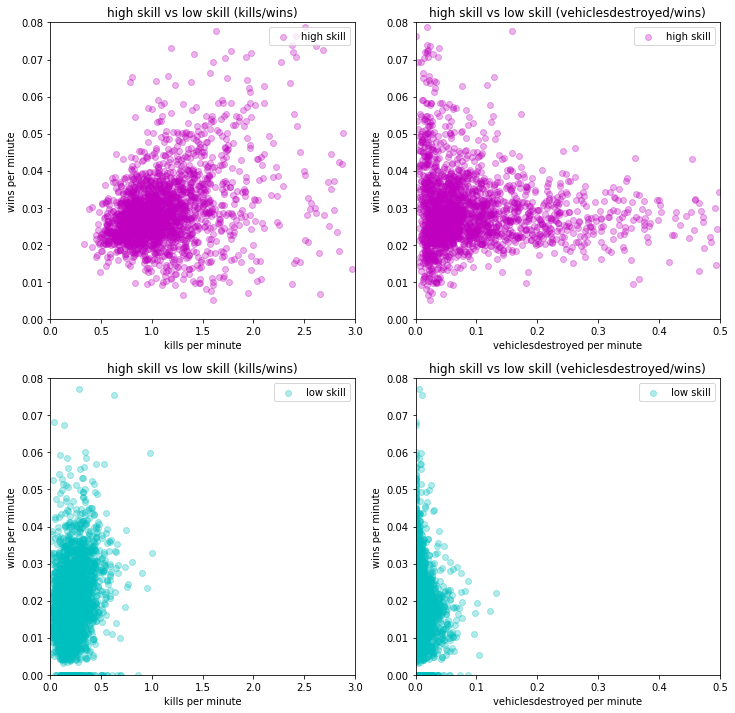

In [53]:
_ = plt.subplots(figsize=(12,12))
_ = plt.subplot(2,2,1)
_ = plt.scatter(df_high_skill.kills_pm,df_high_skill.numWins_pm, alpha = 0.3, color = 'm',label = 'high skill')
_ = plt.legend(loc='upper right')
_ = plt.xlabel('kills per minute')
_ = plt.ylabel('wins per minute')
_ = plt.title('high skill vs low skill (kills/wins)')
_ = plt.xlim(0,3)
_ = plt.ylim(0,0.08)

_ = plt.subplot(2,2,2)
_ = plt.scatter(df_high_skill.vehiclesDestroyed_pm,df_high_skill.numWins_pm, alpha = 0.3, color = 'm',label = 'high skill')
_ = plt.legend(loc='upper right')
_ = plt.xlabel('vehiclesdestroyed per minute')
_ = plt.ylabel('wins per minute')
_ = plt.title('high skill vs low skill (vehiclesdestroyed/wins)')
_ = plt.xlim(0,0.5)
_ = plt.ylim(0,0.08)

_ = plt.subplot(2,2,3)
_ = plt.scatter(df_low_skill.kills_pm,df_low_skill.numWins_pm, alpha = 0.3, color = 'c',  label = 'low skill')
_ = plt.legend(loc='upper right')
_ = plt.xlabel('kills per minute')
_ = plt.ylabel('wins per minute')
_ = plt.title('high skill vs low skill (kills/wins)')
_ = plt.xlim(0,3)
_ = plt.ylim(0,0.08)

_ = plt.subplot(2,2,4)
_ = plt.scatter(df_low_skill.vehiclesDestroyed_pm,df_low_skill.numWins_pm, alpha = 0.3, color = 'c',label = 'low skill')
_ = plt.legend(loc='upper right')
_ = plt.xlabel('vehiclesdestroyed per minute')
_ = plt.ylabel('wins per minute')
_ = plt.title('high skill vs low skill (vehiclesdestroyed/wins)')
_ = plt.xlim(0,0.5)
_ = plt.ylim(0,0.08)

## Do you see any correlations?

By creating a correlation matrix, we can see a good number of factors either positively or negatively affecting each other. A few conclusions we can draw are: the more time spent playing the game, the higher score you'll get; conquest mode gives the most score per minute; headshots, assists both helps with generating effective kills per minute, meaning that the game rewards players on both skill and teamplay; nemesis kills, which means killing a player over and over again without being killed by that player, seems to contribute to kills per minute as well, which means within a matchup there might be low level players that are being picked or targeted specifically by the same high level player; lastly, the headshot per effective hit ratio seems to negatively affect the overall score and score per minute of the player, in combination with the previous conclusion we got about high level players get more kills with headshots, we can conclude that the majority of BF4 players rely on body shots and instead of headshots to make kills. The theory could be that headshots are hard to make and that to make a kill requires multiple headshots, which only the players with the highest skill can achieve.

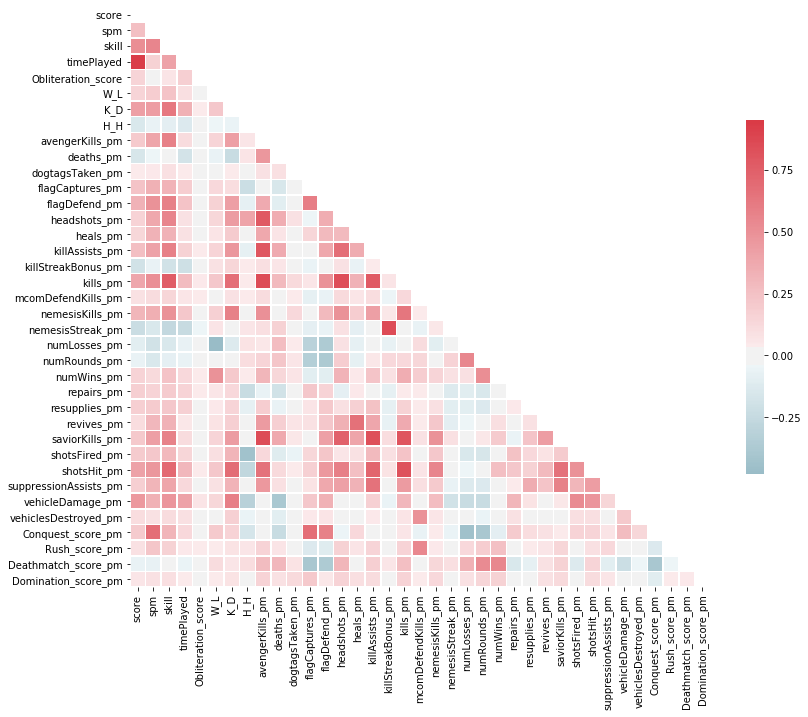

In [54]:
# calculate the correlation of all data within the set
corr = df_basic_1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 0.95, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=False)

## Is there a hypothesis you’d like to investigate further?

There are other interesting analysises we can do on this dataset, namely whether BF4 is a team play heavy game or individual heavy game; what kind of weapon loadouts are the most commonly used or most effective in generating higher scores; what kind of vehicle is commonly used and most effective in getting scores; What is the distinction between players that prefer one game mode over the other, are players who play a lot of deathmatches more skillful than the players who play more rush or domination; what about flag carries, are flag carries more likely to get killed compared to non-flag carriers. These are the questions that can be further analyzed if we dig a little deeper.